In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))

In [2]:
#load the data
bc = pd.read_csv('C:/Users/solavlip/Downloads/breast-cancer.csv')

In [3]:
#check the data
bc.head(3)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   
2  ...         23.57          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  

[3 rows x 32 columns]

In [4]:
#check data info
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#check the variables
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
#check missing values
bc.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#check data distribution
bc.describe().round(2)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count  5.690000e+02       569.00        569.00          569.00     569.00   
mean   3.037183e+07        14.13         19.29           91.97     654.89   
std    1.250206e+08         3.52          4.30           24.30     351.91   
min    8.670000e+03         6.98          9.71           43.79     143.50   
25%    8.692180e+05        11.70         16.17           75.17     420.30   
50%    9.060240e+05        13.37         18.84           86.24     551.10   
75%    8.813129e+06        15.78         21.80          104.10     782.70   
max    9.113205e+08        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count           569.00            569.00          569.00               569.00   
mean              0.10              0.10            0.09                 0.05   
std               0.01              0.05            0.08                 0.04   
min               0.05              0.02            0.00                 0.00   
25%               0.09              0.06            0.03                 0.02   
50%               0.10              0.09            0.06                 0.03   
75%               0.11              0.13            0.13                 0.07   
max               0.16              0.35            0.43                 0.20   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count         569.00  ...        569.00         569.00           569.00   
mean            0.18  ...         16.27          25.68           107.26   
std             0.03  ...          4.83           6.15            33.60   
min             0.11  ...          7.93          12.02            50.41   
25%             0.16  ...         13.01          21.08            84.11   
50%             0.18  ...         14.97          25.41            97.66   
75%             0.20  ...         18.79          29.72           125.40   
max             0.30  ...         36.04          49.54           251.20   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count      569.00            569.00             569.00           569.00   
mean       880.58              0.13               0.25             0.27   
std        569.36              0.02               0.16             0.21   
min        185.20              0.07               0.03             0.00   
25%        515.30              0.12               0.15             0.11   
50%        686.50              0.13               0.21             0.23   
75%       1084.00              0.15               0.34             0.38   
max       4254.00              0.22               1.06             1.25   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count                569.00          569.00                   569.00  
mean                   0.11            0.29                     0.08  
std                    0.07            0.06                     0.02  
min                    0.00            0.16                     0.06  
25%                    0.06            0.25                     0.07  
50%                    0.10            0.28                     0.08  
75%                    0.16            0.32                     0.09  
max                    0.29            0.66                     0.21  

[8 rows x 31 columns]

In [8]:
#drop the ID column as it is not needed
bc= bc.drop("id",axis=1)

In [9]:
#check samples of the remaining columns
bc.sample(3)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
526         B        13.46         18.75           87.44      551.1   
105         M        13.11         15.56           87.21      530.2   
510         B        11.74         14.69           76.31      426.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
526          0.10750           0.11380         0.04201              0.03152   
105          0.13980           0.17650         0.20710              0.09601   
510          0.08099           0.09661         0.06726              0.02639   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
526         0.1723  ...         15.35          25.16           101.90   
105         0.1925  ...         16.31          22.40           106.40   
510         0.1499  ...         12.45          17.60            81.25   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
526       719.8            0.1624             0.3124           0.2654   
105       827.2            0.1862             0.4099           0.6376   
510       473.8            0.1073             0.2793           0.2690   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
526                0.1427          0.3518                  0.08665  
105                0.1986          0.3147                  0.14050  
510                0.1056          0.2604                  0.09879  

[3 rows x 31 columns]

### Univariate Analysis

In [14]:
bc['diagnosis'].value_counts()

Benign       357
Malignant    212
Name: diagnosis, dtype: int64

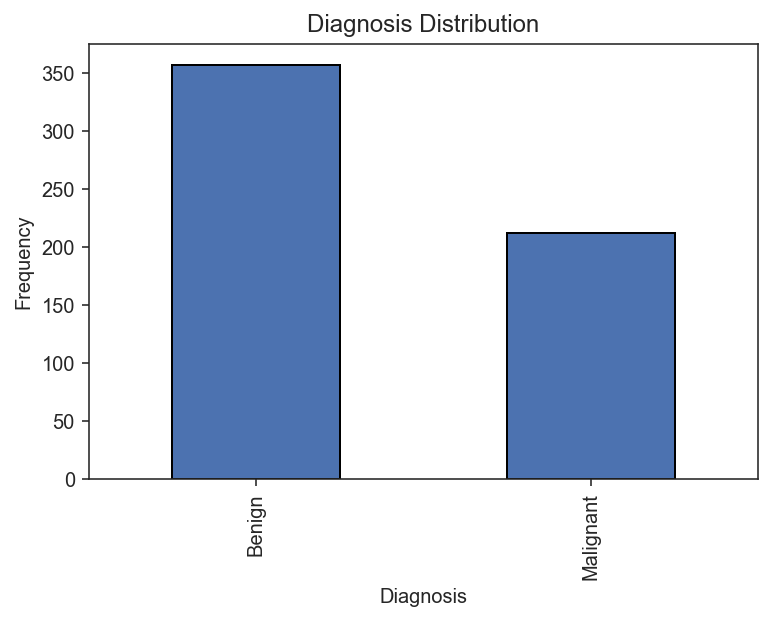

In [12]:
#Find the distribution of the target i.e diagnosis

plt.figure(figsize=(6, 4))

# Map 'B' to 'Benign' and 'M' to 'Malignant' for the plot labels
bc['diagnosis'] = bc['diagnosis'].map({'B': 'Benign', 'M': 'Malignant'})
bc['diagnosis'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Diagnosis Distribution')
plt.show()



### Multivariate Analysis


<Figure size 720x576 with 0 Axes>

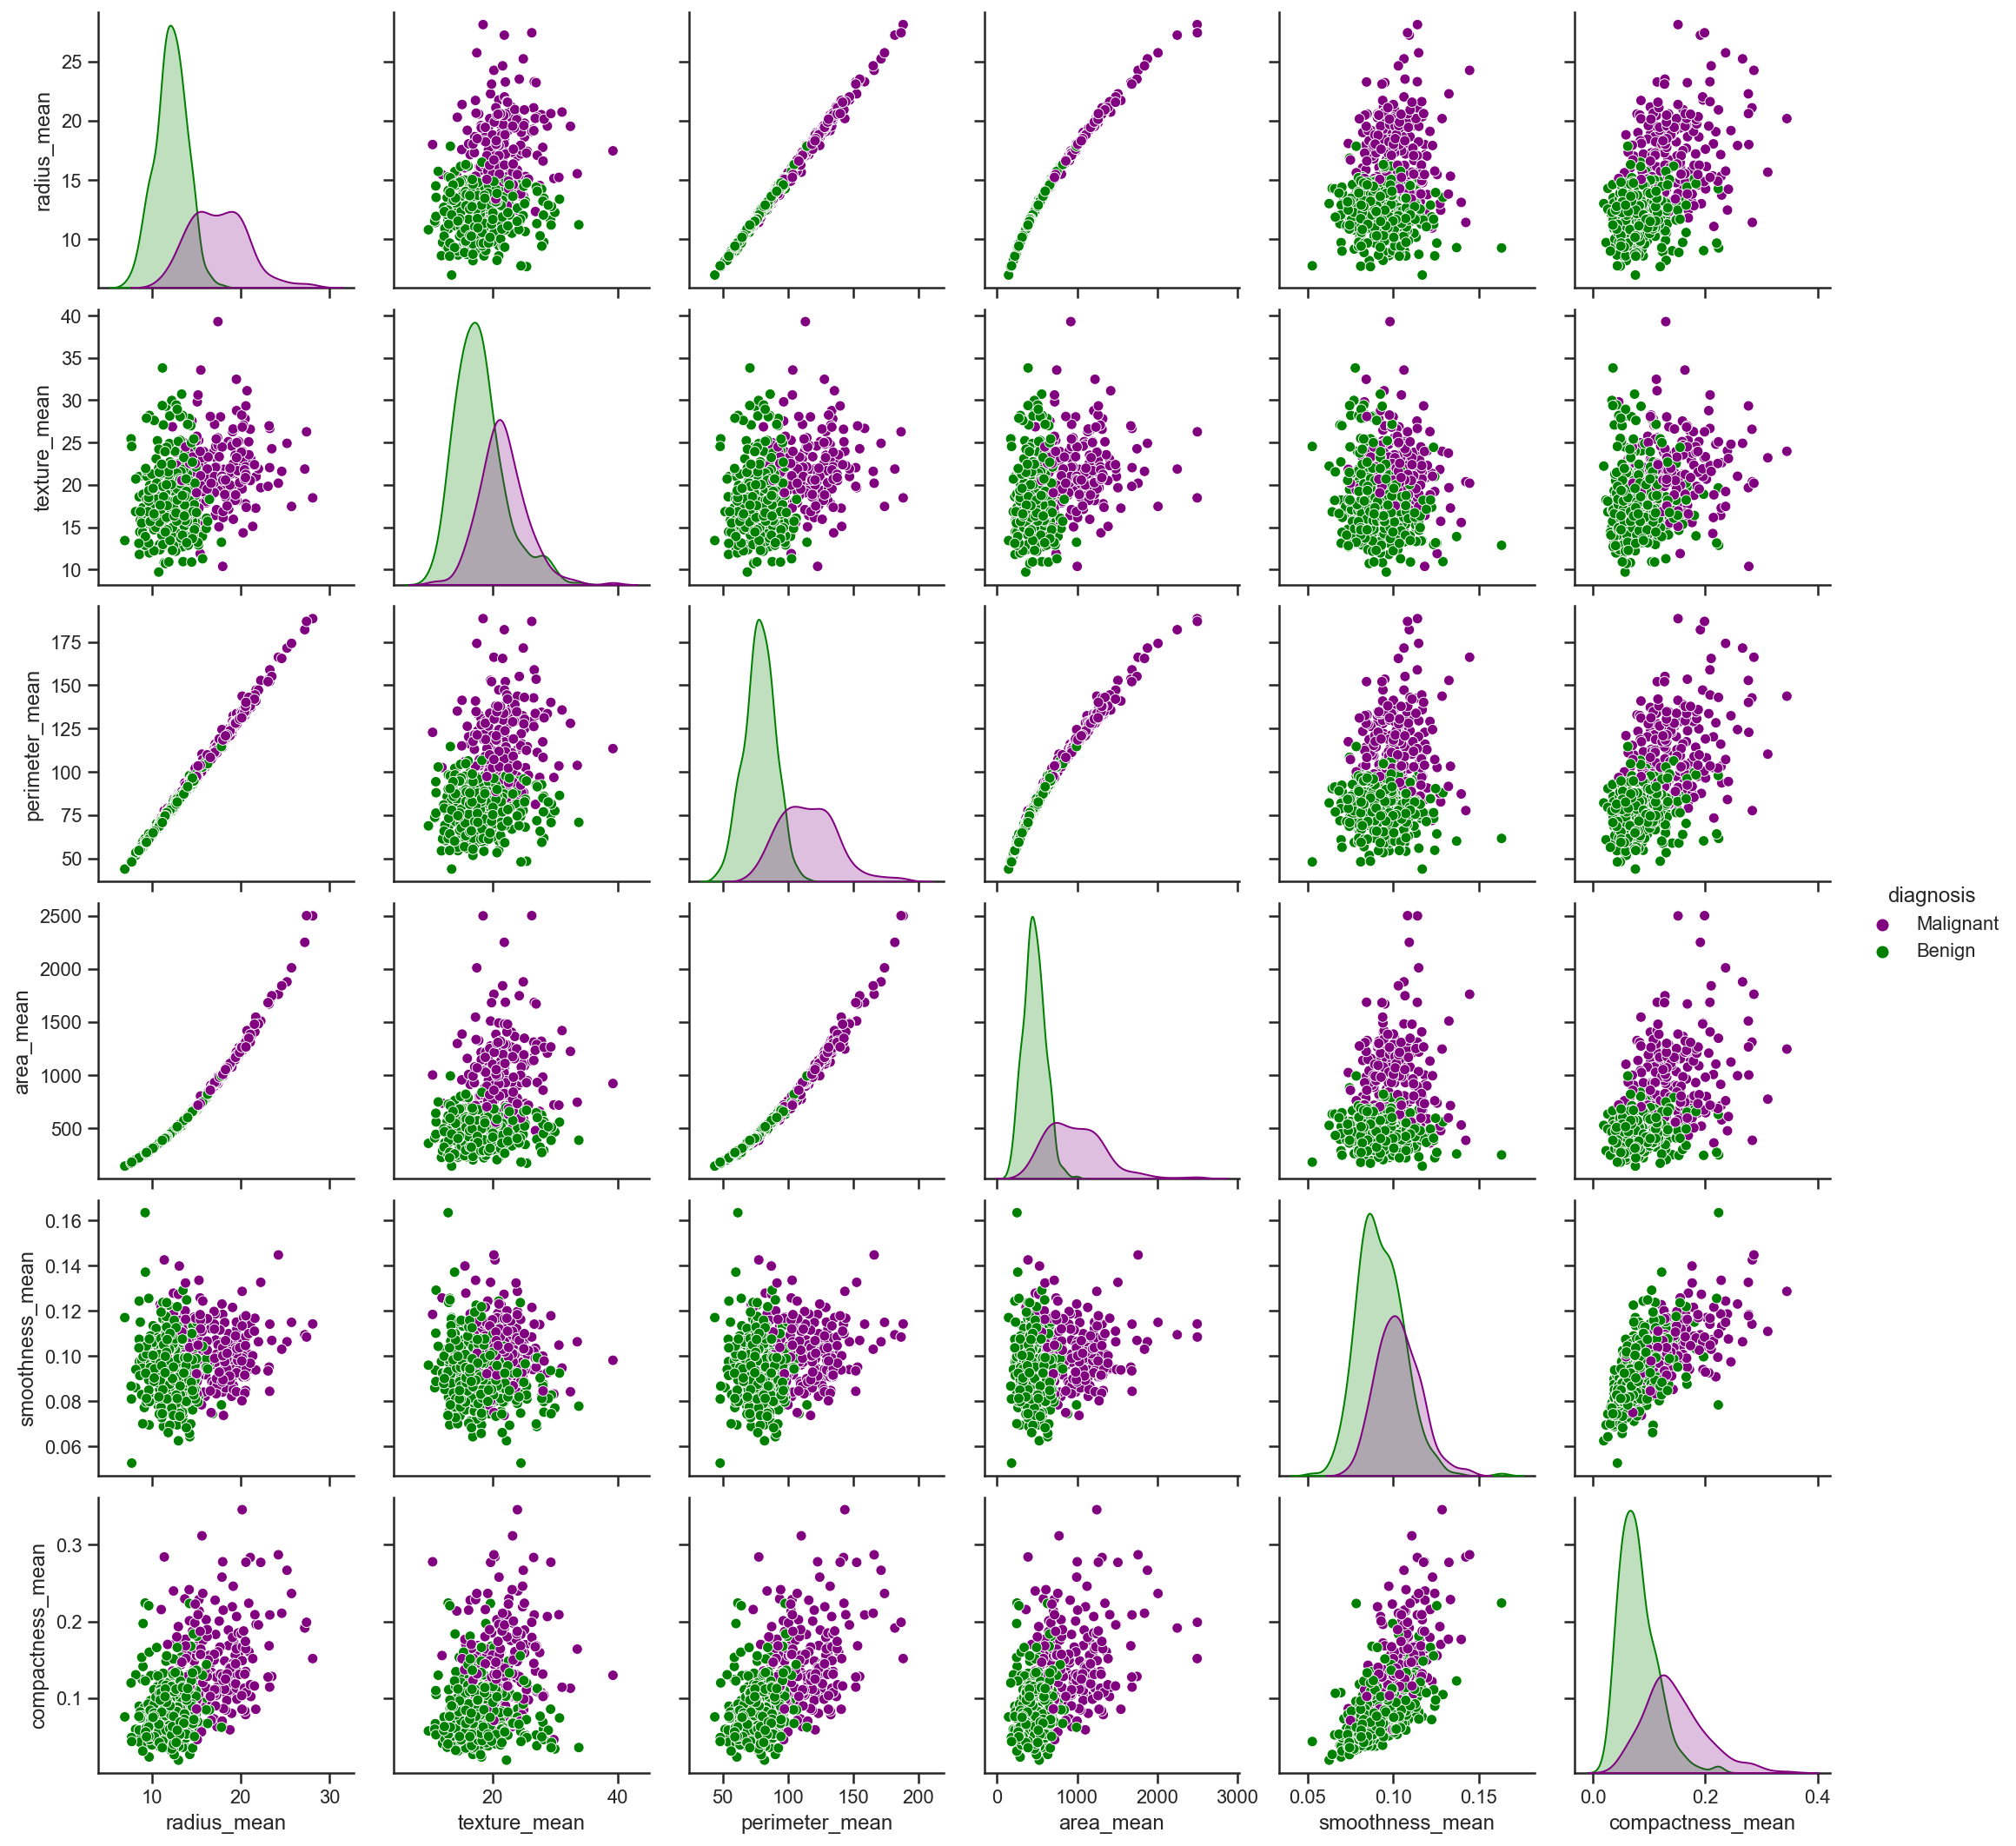

In [19]:
# How are the features related to the target

plt.figure(figsize=(10, 8))
custom_palette = {'Benign': 'green', 'Malignant': 'purple'}

sns.set(style="ticks")
sns.pairplot(bc.iloc[:, 0:7], hue='diagnosis', palette=custom_palette)
plt.show()


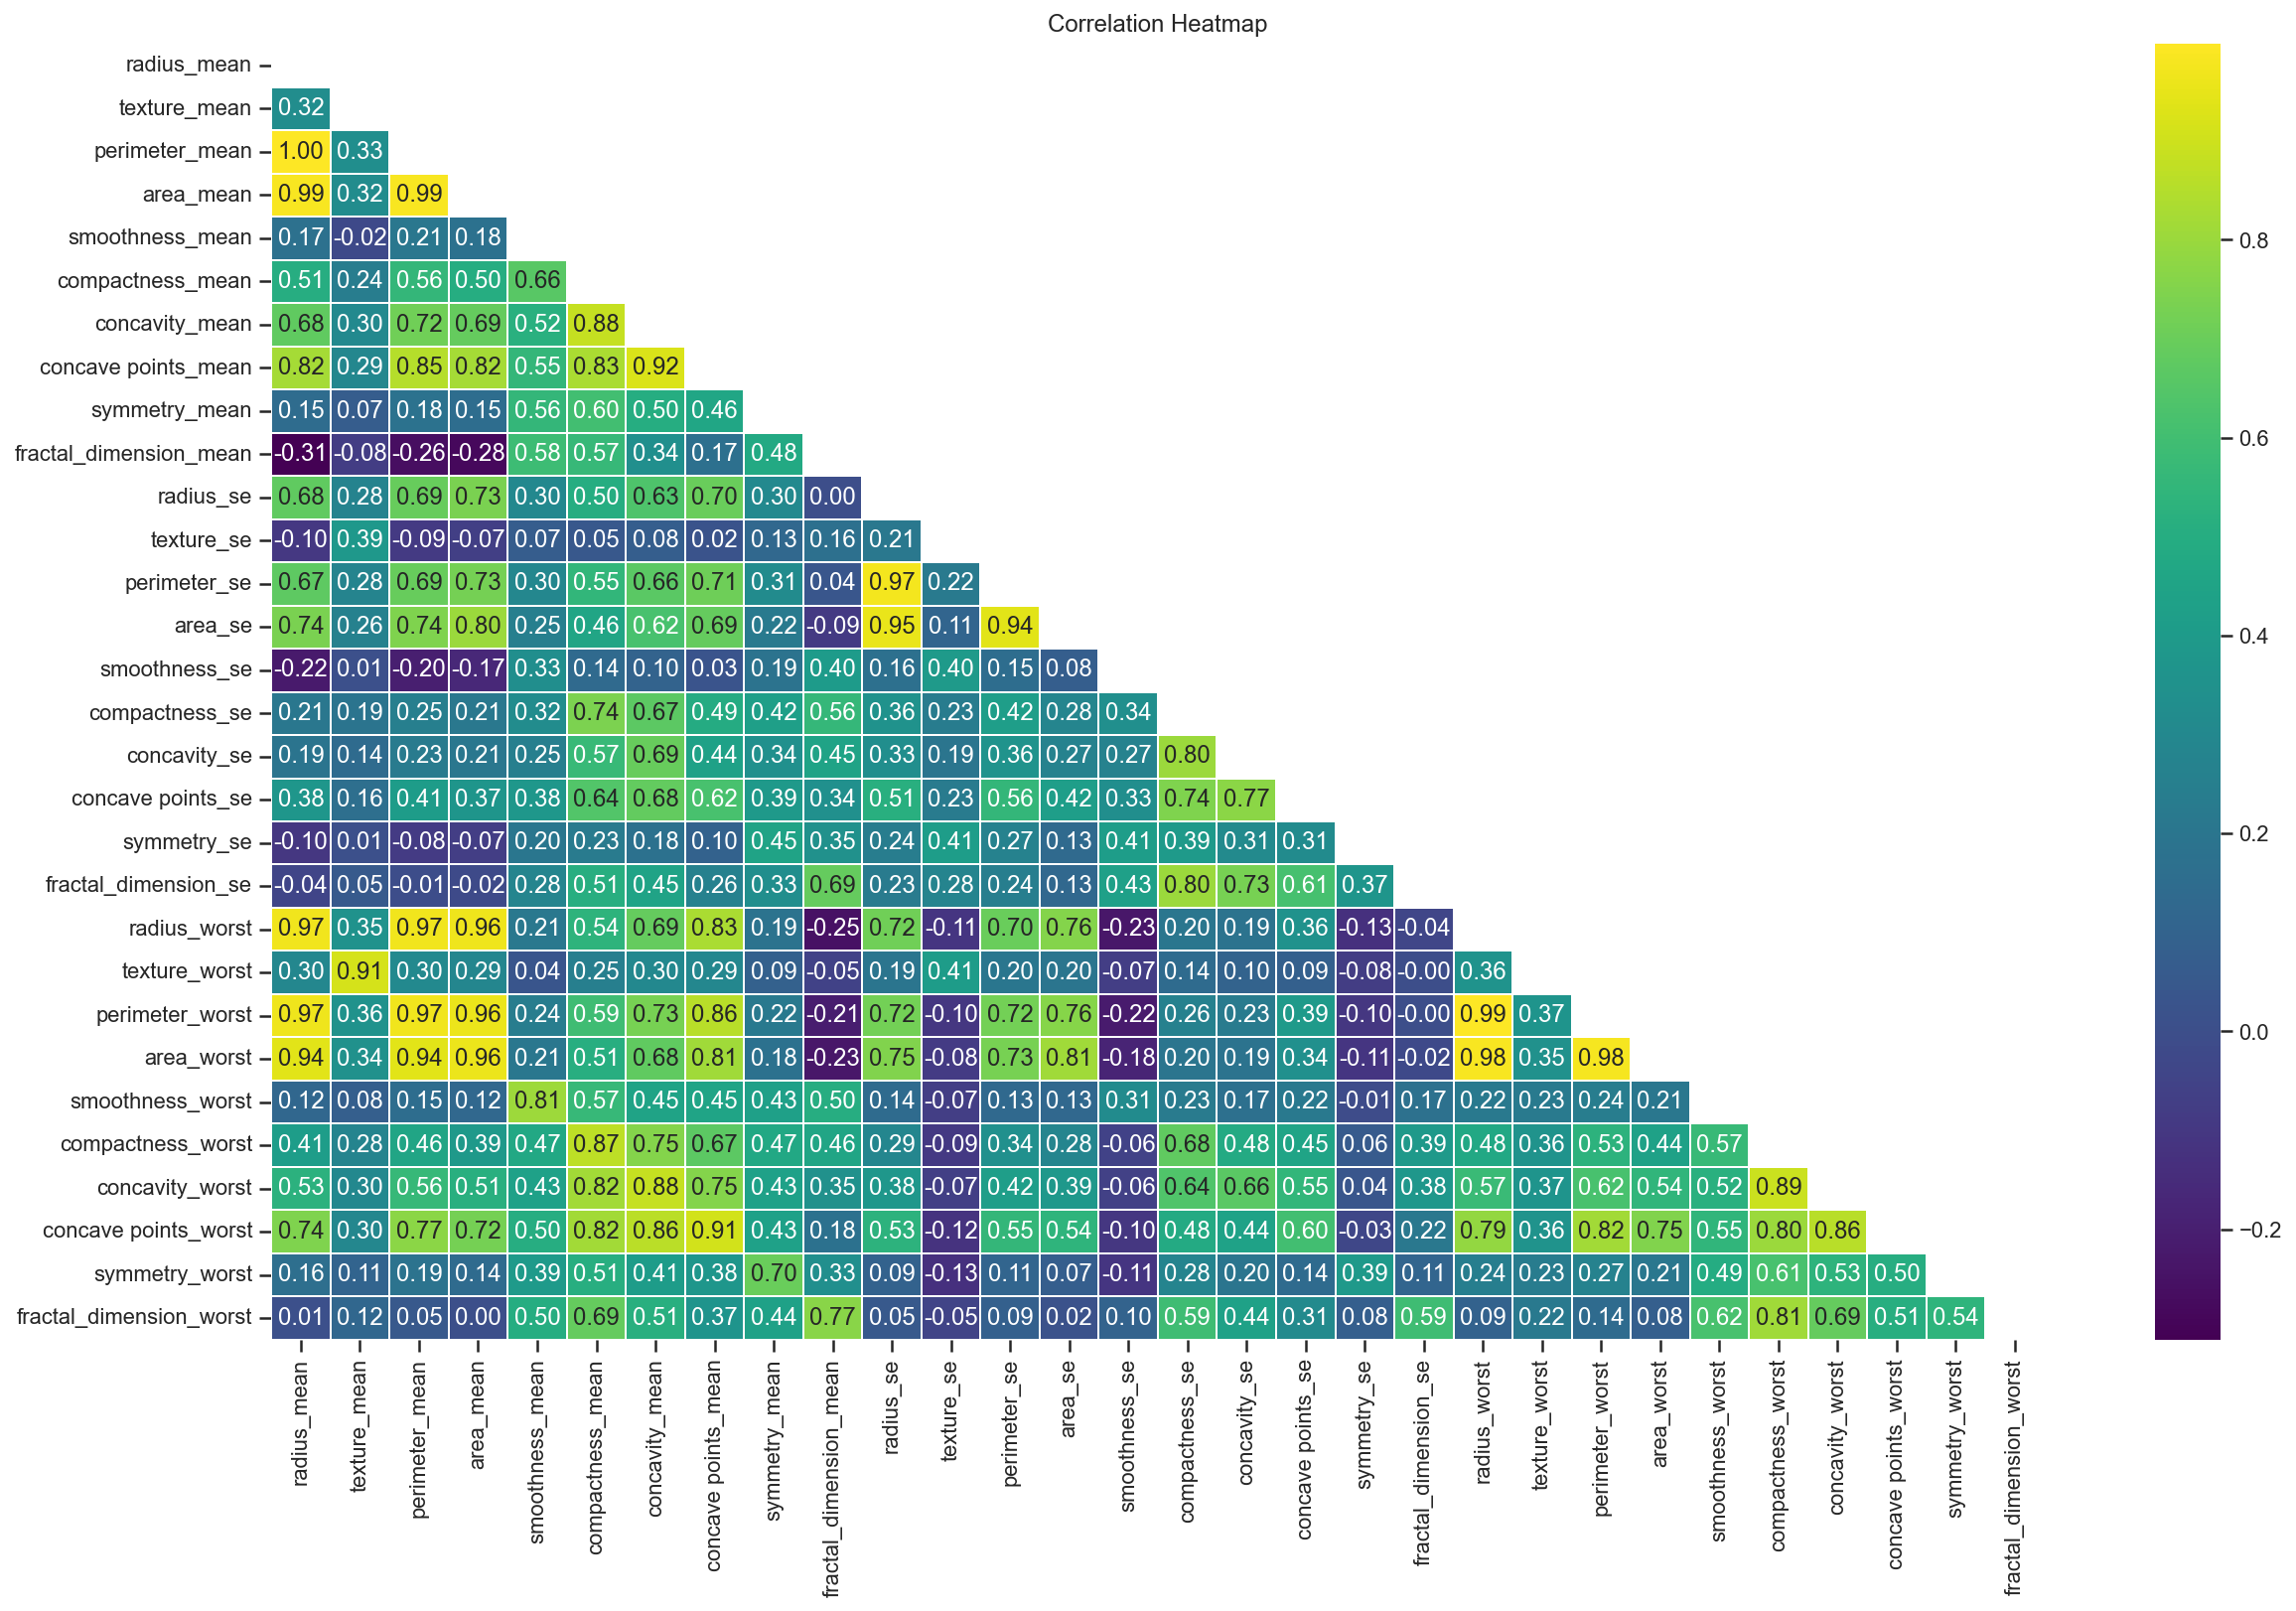

In [20]:
#Find the correlation to see features that are highly correlated
plt.figure(figsize=(20, 12))

corr = bc.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap='viridis')  # Change 'viridis' to your preferred colormap
plt.title('Correlation Heatmap')
plt.show()



In [21]:
#Remove features that are highly correlated

# Calculate the correlation matrix
corr_matrix = bc.corr()

# Set a threshold for correlation (you can adjust this threshold)
correlation_threshold = 0.75  # Features with a correlation coefficient above this threshold will be considered highly correlated

# Create a set to store the names of features to be removed
features_to_remove = set()

# Iterate through the columns of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
            colname = corr_matrix.columns[i]
            features_to_remove.add(colname)

# Convert the set of features to remove to a list
features_to_remove = list(features_to_remove)

# Remove the highly correlated features from the DataFrame
bc_filtered = bc.drop(columns=features_to_remove)

# Display the remaining features
print("Remaining Features:")
print(bc_filtered.columns)


Remaining Features:
Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'symmetry_worst'],
      dtype='object')


In [23]:
bc_filtered.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'symmetry_worst'],
      dtype='object')

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load or create your 'bc_filtered' DataFrame
# For example:
# bc_filtered = pd.read_csv('your_filtered_data.csv')

# Split the data into features (X) and the target variable (y)
X = bc_filtered.drop('diagnosis', axis=1)
y = bc_filtered['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (SVM, KNN benefit from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Model 2: Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

# Model 3: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Model 4: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

# Model 5: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate and print the results for each model
def evaluate_model(model_name, predictions):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", report)

# Evaluate and print results for each model
evaluate_model("Support Vector Machine (SVM)", svm_predictions)
evaluate_model("Logistic Regression", logistic_predictions)
evaluate_model("Random Forest", rf_predictions)
evaluate_model("K-Nearest Neighbors (KNN)", knn_predictions)
evaluate_model("Decision Tree", dt_predictions)


Model: Support Vector Machine (SVM)
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Model: Logistic Regression
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Model: Random Forest
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.94      0.95        71
   Malignant       0.91      0.93   

In [25]:

from sklearn.metrics import confusion_matrix, classification_report


# Split the data into features (X) and the target variable (y)
X = bc_filtered.drop('diagnosis', axis=1)
y = bc_filtered['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (SVM, KNN benefit from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Model 2: Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
logistic_predictions = logistic_model.predict(X_test_scaled)

# Model 3: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Model 4: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

# Model 5: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Define a function to print the confusion matrix
def print_confusion_matrix(model_name, predictions):
    cm = confusion_matrix(y_test, predictions)
    print(f"Confusion Matrix for {model_name}:\n")
    print(pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant']))
    print("\n")

# Print the confusion matrix for each model
print_confusion_matrix("Support Vector Machine (SVM)", svm_predictions)
print_confusion_matrix("Logistic Regression", logistic_predictions)
print_confusion_matrix("Random Forest", rf_predictions)
print_confusion_matrix("K-Nearest Neighbors (KNN)", knn_predictions)
print_confusion_matrix("Decision Tree", dt_predictions)


Confusion Matrix for Support Vector Machine (SVM):

                  Predicted Benign  Predicted Malignant
Actual Benign                   68                    3
Actual Malignant                 3                   40


Confusion Matrix for Logistic Regression:

                  Predicted Benign  Predicted Malignant
Actual Benign                   69                    2
Actual Malignant                 2                   41


Confusion Matrix for Random Forest:

                  Predicted Benign  Predicted Malignant
Actual Benign                   67                    4
Actual Malignant                 3                   40


Confusion Matrix for K-Nearest Neighbors (KNN):

                  Predicted Benign  Predicted Malignant
Actual Benign                   68                    3
Actual Malignant                 6                   37


Confusion Matrix for Decision Tree:

                  Predicted Benign  Predicted Malignant
Actual Benign                   63            

In [26]:
#Find the best model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a dictionary to store model accuracy scores
model_accuracies = {}

# Model 1: Support Vector Machine (SVM)
# (Already trained in previous code)

# Calculate and store accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
model_accuracies["Support Vector Machine (SVM)"] = svm_accuracy

# Model 2: Logistic Regression
# (Already trained in previous code)

# Calculate and store accuracy
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
model_accuracies["Logistic Regression"] = logistic_accuracy

# Model 3: Random Forest
# (Already trained in previous code)

# Calculate and store accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
model_accuracies["Random Forest"] = rf_accuracy

# Model 4: K-Nearest Neighbors (KNN)
# (Already trained in previous code)

# Calculate and store accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
model_accuracies["K-Nearest Neighbors (KNN)"] = knn_accuracy

# Model 5: Decision Tree
# (Already trained in previous code)

# Calculate and store accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
model_accuracies["Decision Tree"] = dt_accuracy

# Find the best model based on accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"The best model based on accuracy is: {best_model}")




The best model based on accuracy is: Logistic Regression


In [27]:
# Since 'logistic_model' is the best trained Logistic Regression model

# Get the coefficients (weights) of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display feature coefficients along with their names
coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coefficient_df['Absolute Coefficient'] = abs(coefficient_df['Coefficient'])

# Sort the DataFrame by the absolute coefficient values in descending order
coefficient_df = coefficient_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature coefficients
print("Feature Coefficients:\n", coefficient_df)


Feature Coefficients:
                    Feature  Coefficient  Absolute Coefficient
0              radius_mean     2.555406              2.555406
11          symmetry_worst     2.404598              2.404598
6                radius_se     1.957054              1.957054
10             symmetry_se    -1.401010              1.401010
1             texture_mean     1.213180              1.213180
3         compactness_mean     1.071946              1.071946
2          smoothness_mean     0.737692              0.737692
5   fractal_dimension_mean    -0.518547              0.518547
4            symmetry_mean    -0.495099              0.495099
8            smoothness_se     0.337742              0.337742
9           compactness_se    -0.276483              0.276483
7               texture_se     0.062684              0.062684


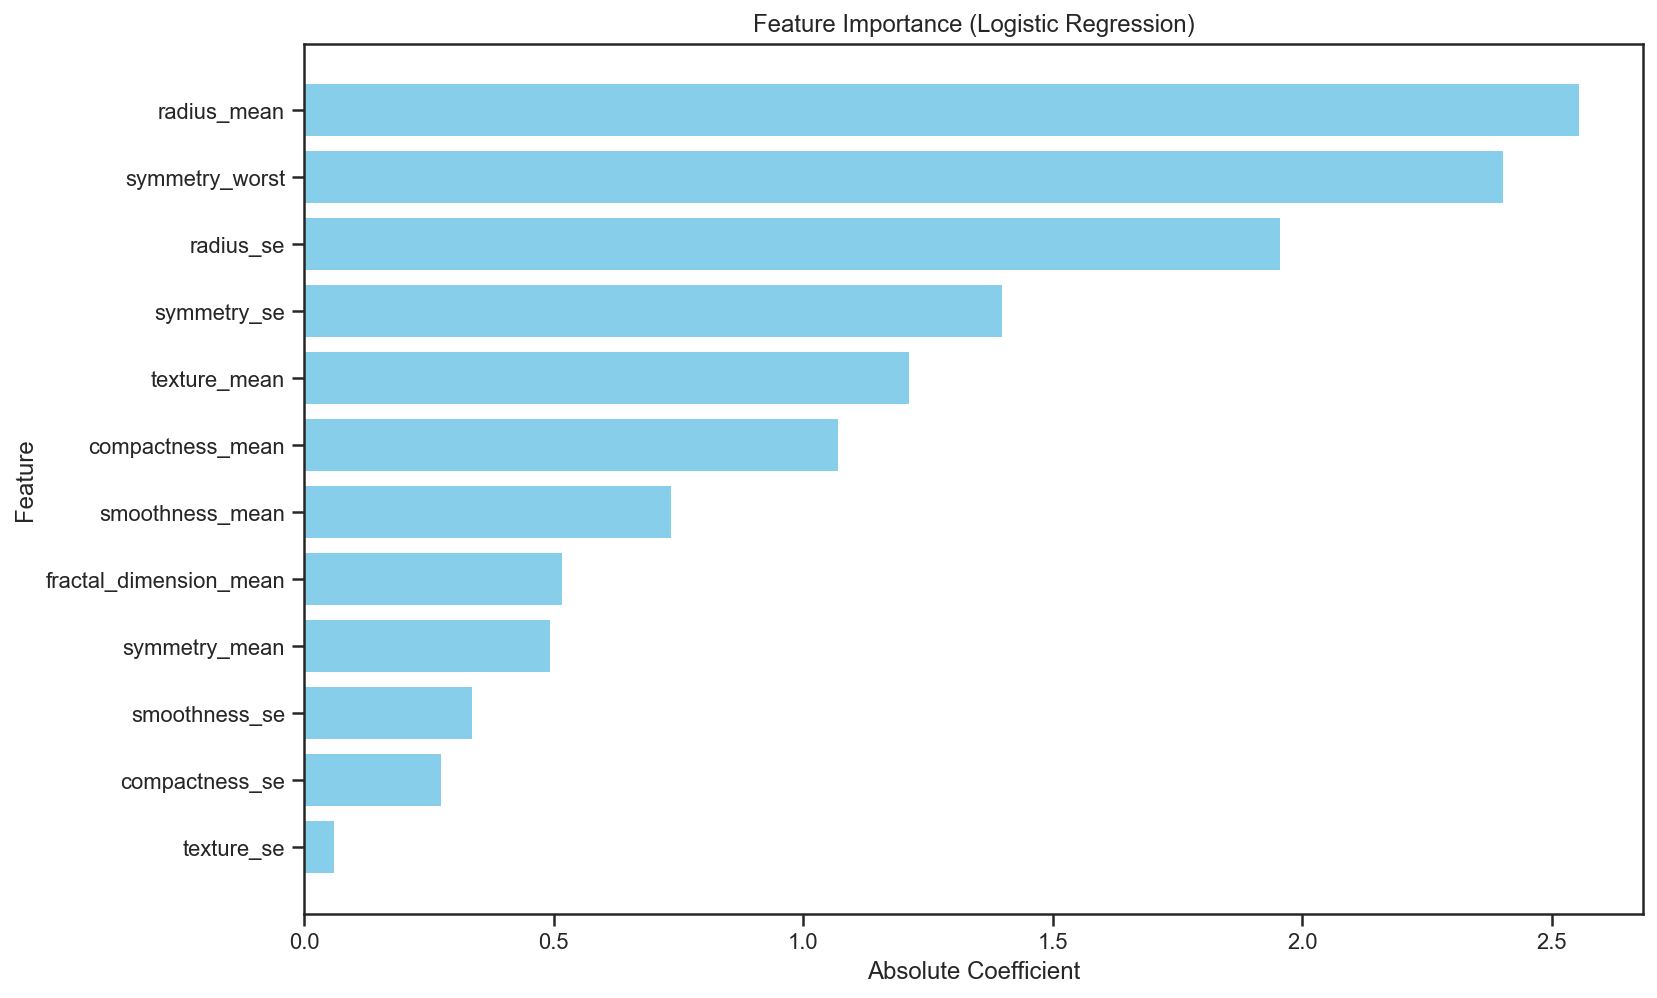

In [28]:
#Display it on a graph

# Get the coefficients (weights) of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display feature coefficients along with their names
coefficient_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coefficient_df['Absolute Coefficient'] = abs(coefficient_df['Coefficient'])

# Sort the DataFrame by the absolute coefficient values in descending order
coefficient_df = coefficient_df.sort_values(by='Absolute Coefficient', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(coefficient_df['Feature'], coefficient_df['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()
